In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
N = 150
p = 0.3
q = 0.3
steps = 1000
num_initial_infected = 4
runs_per_mode = 10

SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

def initialize_grid(mode):
    grid = np.zeros((N, N), dtype=int)

    if mode == "random":
        positions = set()
        while len(positions) < num_initial_infected:
            i = random.randint(0, N - 1)
            j = random.randint(0, N - 1)
            positions.add((i, j))
        initial_positions = list(positions)

    elif mode == "even":
        # Divide the grid into quadrants and place one infected in each center
        half = N // 2
        quarter = N // 4
        initial_positions = [
            (quarter, quarter),
            (quarter, N - quarter),
            (N - quarter, quarter),
            (N - quarter, N - quarter)
        ][:num_initial_infected]

    elif mode == "far":
        initial_positions = [
            (1, 1),
            (1, N - 2),
            (N - 2, 1),
            (N - 2, N - 2)
        ][:num_initial_infected]

    elif mode == "clustered":
        # Cluster the infected individuals in a tight group at the center
        cluster_radius = 2  # Size of the cluster (2x2 block in the center)
        center_i, center_j = N // 2, N // 2
        initial_positions = []

        for di in range(-cluster_radius, cluster_radius + 1):
            for dj in range(-cluster_radius, cluster_radius + 1):
                if len(initial_positions) < num_initial_infected:
                    i = center_i + di
                    j = center_j + dj
                    if 0 <= i < N and 0 <= j < N:
                        initial_positions.append((i, j))

    else:
        raise ValueError("Invalid mode.")

    for i, j in initial_positions:
        grid[i, j] = INFECTED

    return grid

def run_sir_simulation(grid):
    I_counts = []

    for _ in range(steps):
        new_grid = grid.copy()
        for i in range(N):
            for j in range(N):
                if grid[i, j] == SUSCEPTIBLE:
                    neighbors = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]
                    for ni, nj in neighbors:
                        if 0 <= ni < N and 0 <= nj < N:
                            if grid[ni, nj] == INFECTED and np.random.rand() < p:
                                new_grid[i, j] = INFECTED
                                break
                elif grid[i, j] == INFECTED:
                    if np.random.rand() < q:
                        new_grid[i, j] = RECOVERED
        grid[:] = new_grid
        I_counts.append(np.sum(grid == INFECTED))

    I_array = np.array(I_counts) / (N * N)
    peak_intensity = np.max(I_array)
    peak_duration = np.sum(I_array >= 0.9 * peak_intensity)
    equilibrium_time = np.max(np.where(I_array > 0)[0]) if np.any(I_array > 0) else 0

    return peak_duration, peak_intensity, equilibrium_time

def run_trials(mode):
    results = []
    for _ in range(runs_per_mode):
        grid = initialize_grid(mode)
        result = run_sir_simulation(grid)
        results.append(result)
    return np.array(results)

# Run all modes
modes = ["random", "even", "far", "clustered"]
all_results = {mode: run_trials(mode) for mode in modes}



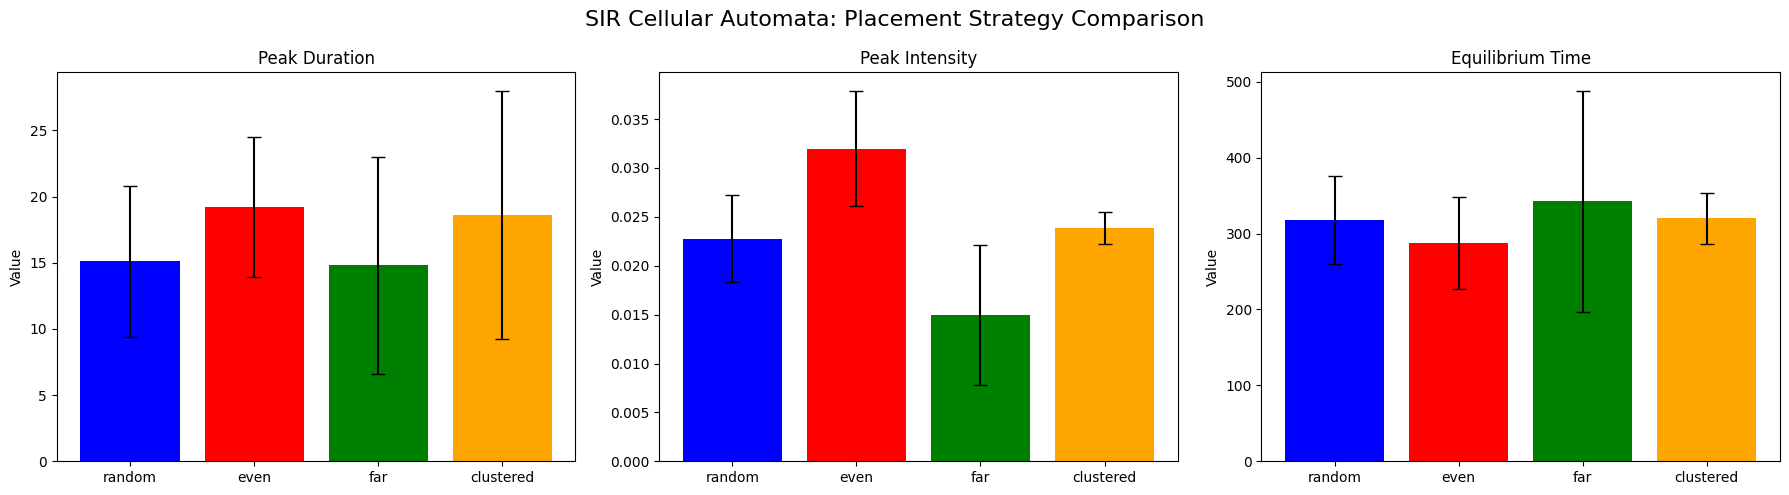

In [24]:
labels = ["Peak Duration", "Peak Intensity", "Equilibrium Time"]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, label in enumerate(labels):
    means = [np.mean(all_results[mode][:, i]) for mode in modes]
    stds = [np.std(all_results[mode][:, i]) for mode in modes]

    axs[i].bar(modes, means, yerr=stds, capsize=5, color=["blue", "red", "green","orange"])
    axs[i].set_title(label)
    axs[i].set_ylabel("Value")
    axs[i].grid(False)

plt.suptitle("SIR Cellular Automata: Placement Strategy Comparison", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_15211/2675052392.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


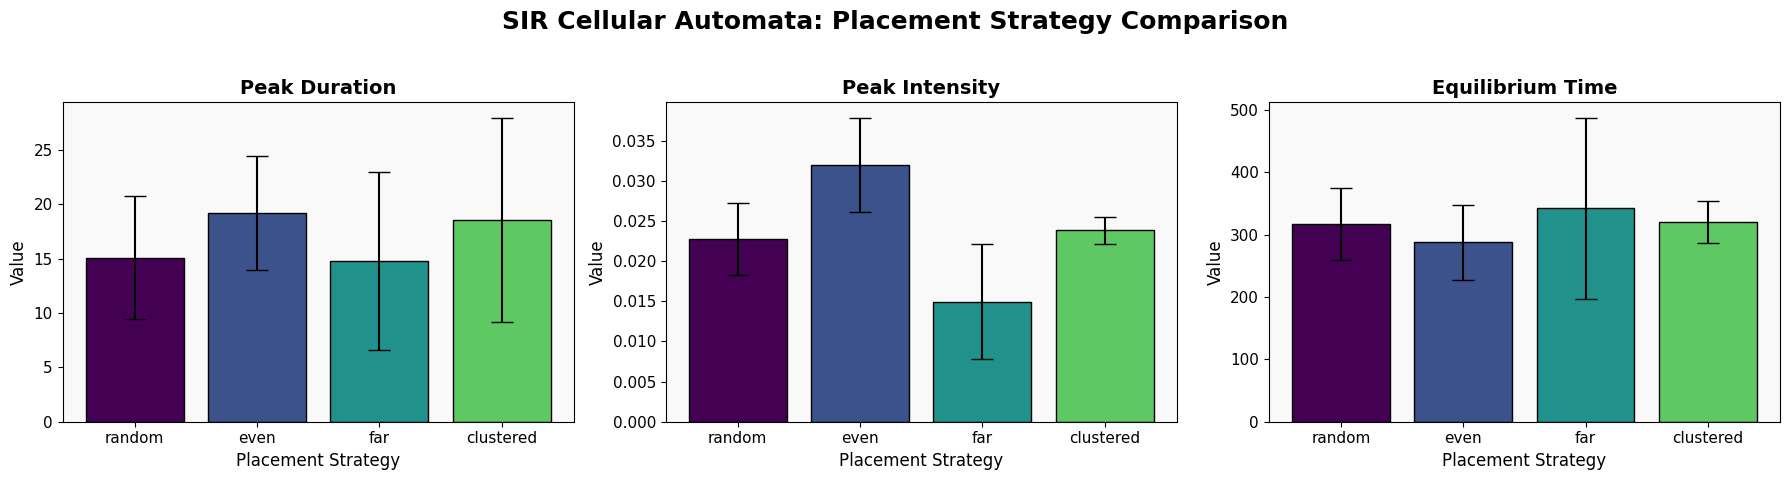

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

labels = ["Peak Duration", "Peak Intensity", "Equilibrium Time"]
modes = list(all_results.keys())

# Viridis colormap
cmap = get_cmap('viridis')
colors = [cmap(i / len(modes)) for i in range(len(modes))]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, label in enumerate(labels):
    means = [np.mean(all_results[mode][:, i]) for mode in modes]
    stds = [np.std(all_results[mode][:, i]) for mode in modes]

    axs[i].bar(
        modes,
        means,
        yerr=stds,
        capsize=8,
        color=colors,
        edgecolor='black'
    )

    axs[i].set_title(label, fontsize=14, fontweight='bold')
    axs[i].set_ylabel("Value", fontsize=12)
    axs[i].set_xlabel("Placement Strategy", fontsize=12)
    axs[i].set_ylim(bottom=0)
    axs[i].tick_params(axis='both', labelsize=11)
    axs[i].set_facecolor('#F9F9F9')  # Light clean background

plt.suptitle("SIR Cellular Automata: Placement Strategy Comparison", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

